# 🎮 Video Game Sales Forecasting Project
## 🎯 Project Introduction

This project aims to analyze historical video game sales data to uncover key patterns that can help predict successful titles and inform strategic decisions for 2017. 

Using a dataset that includes user and critic ratings, platforms, genres, and regional sales figures, the analysis explores trends by year, genre, platform, and rating (ESRB), identifying what drives higher sales and how game characteristics influence success.

Through data cleaning, exploratory visualizations, user profile analysis by region, and hypothesis testing, this project develops a data-driven understanding of the video game market and provides actionable insights.


## 📁 Step 1: Loading and Initial Data Exploration


In [ ]:


#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from plotly.subplots import make_subplots
import plotly.express as px


In [2]:
#Importing the dataset
dataset = pd.read_csv('games.csv')


In [3]:
dataset.sample(10) # Displaying the first 10 rows of the dataset

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1610,Star Wars Episode III: Revenge of the Sith,XB,2005.0,Action,0.82,0.38,0.00,0.04,61.0,8.1,T
7890,3rd Super Robot Wars Z Jigoku Hen,PSV,2014.0,Role-Playing,0.00,0.00,0.19,0.00,NaN,NaN,NaN
7521,Crazy Taxi 3: High Roller,XB,2002.0,Racing,0.14,0.04,0.02,0.01,69.0,8.5,T
10757,Blue Dragon: Awakened Shadow,DS,2009.0,Role-Playing,0.06,0.00,0.03,0.00,63.0,6.6,E10+
5154,NCAA Football 07,PSP,2006.0,Sports,0.34,0.00,0.00,0.03,75.0,7.9,E
4703,F1 2014,PS3,2014.0,Racing,0.07,0.26,0.02,0.06,62.0,4.1,E
9622,Hour of Victory,X360,2007.0,Shooter,0.10,0.01,0.00,0.01,37.0,3,T
887,Call of Duty: World at War,Wii,2008.0,Shooter,1.17,0.58,0.00,0.18,83.0,7.6,M
1287,Fight Night 2004,PS2,2004.0,Fighting,1.08,0.20,0.00,0.20,85.0,9,T
6992,The Amazing Spider-Man 2 (2014),X360,2014.0,Action,0.10,0.11,0.00,0.02,NaN,NaN,NaN


In [4]:

dataset.info() # Displaying the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
dataset.describe() # Displaying the statistical information of the dataset

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# Displaying the percentage of null values in the dataset
missing_count = dataset.isnull().sum()

mis_values = pd.DataFrame({
    'missing_values': missing_count,
    '%': round(missing_count / len(dataset), 3)
})

mis_values.head(5) # Displaying the first 5 rows of the missing values

,missing_values,%
Name,2,0.000
Platform,0,0.000
Year_of_Release,269,0.016
Genre,2,0.000
NA_sales,0,0.000


# 🧹 Step 2: Data Preparation


### Standarazing Column Names

In [7]:
dataset.columns = dataset.columns.str.lower() # Converting the column names to lower case

In [8]:
dataset.head() # Displaying the first 5 rows of the dataset

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Handling Missing Values

In [9]:
dataset = dataset.dropna(subset=['name', 'year_of_release', 'genre']) # Dropping the null values in the specified columns

### Data Type Conversion

In [10]:

dataset['year_of_release'] = dataset['year_of_release'].astype(int) # Converting the year_of_release column to integer

In [11]:
dataset['user_score'] = dataset['user_score'].replace('tbd', np.nan) # Replacing the 'tbd' values in the user_score column with NaN
dataset['user_score'] = dataset['user_score'].astype(float) # Converting the user_score column to float

The columns with the most missing values are: year_of_release, genre, rating, critic_score, and user_score.

The missing values in year_of_release and genre likely indicate incomplete metadata and were removed, as they are essential for analysis.

The missing rating values may reflect games that were never officially rated or released in specific regions. These were left as missing to avoid assigning incorrect classifications.

Missing critic_score and user_score are likely due to games with low visibility, limited reviews, or "TBD" entries in the original dataset. These were converted to NaN and kept for analyses where relevant.

For rating and review score columns, instead of imputing values, we worked with filtered subsets to ensure valid comparisons in later correlation and hypothesis testing.

After cleaning, we verified that all transformed columns had the correct data types, and the final dataset used for analysis had no missing values in required fields.

### Calculate Total Sales

In [ ]:
dataset['total_sales'] = dataset['na_sales'] + dataset['eu_sales'] + dataset['jp_sales'] + dataset['other_sales'] # Creating a new column total_sales by summing the sales of all regions
dataset['total_sales'] = dataset['total_sales'].astype(float) # Converting the total_sales column to float

# 📊 Step 3: Exploratory Data Analysis


### Temporal Analysis of Game Releases

In [13]:
game_by_year = dataset.groupby('year_of_release')['name'].count() # Grouping the dataset by name and year_of_release

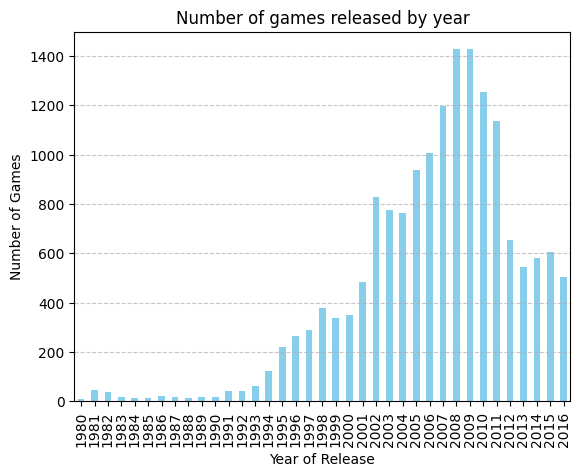

In [14]:
plt.Figure(figsize=(10, 6)) # Setting the figure size
game_by_year.plot(kind='bar', color='skyblue') # Plotting the bar chart
plt.title('Number of games released by year') # Setting the title of the plot
plt.xlabel('Year of Release') # Setting the x-axis label
plt.ylabel('Number of Games') # Setting the y-axis label    
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adding grid lines to the y-axis
plt.show() # Displaying the plot

In [15]:
stats_by_year = dataset.groupby('year_of_release').agg({'name': 'count',
                                                        'total_sales': ['sum', 'mean', 'median'],
                                                        'user_score': 'mean',
                                                        'critic_score': 'mean'}) # Grouping the dataset by year_of_release and calculating the statistics

In [16]:
stats_by_year.columns = ['total_games', 'total_sales_sum', 'total_sales_mean', 'total_sales_median', 'user_score_mean', 'critic_score_mean'] # Renaming the columns of the stats_by_year dataframe
stats_by_year = stats_by_year.reset_index() # Resetting the index of the stats_by_year dataframe


In [17]:
stats_by_year.head(37) # Displaying 37 rows of the stats_by_year dataframe

,year_of_release,total_games,total_sales_sum,total_sales_mean,total_sales_median,user_score_mean,critic_score_mean
0,1980,9,11.38,1.264444,0.770,NaN,NaN
1,1981,46,35.68,0.775652,0.465,NaN,NaN
2,1982,36,28.88,0.802222,0.540,NaN,NaN
3,1983,17,16.80,0.988235,0.770,NaN,NaN
4,1984,14,50.35,3.596429,1.485,NaN,NaN
5,1985,14,53.95,3.853571,1.015,5.800000,59.000000
6,1986,21,37.08,1.765714,1.360,NaN,NaN
7,1987,16,21.70,1.356250,0.885,NaN,NaN
8,1988,15,47.21,3.147333,1.510,2.200000,64.000000
9,1989,17,73.45,4.320588,1.610,NaN,NaN


### Platform Sales Analysis Over Time

In [18]:
sales_overtime = dataset.groupby('total_sales')[['platform', 'year_of_release']].count() # Grouping the dataset by total_sales and counting the number of platforms and year_of_release
sales_overtime = sales_overtime.reset_index() # Resetting the index of the sales_overtime dataframe

<Figure size 1400x800 with 0 Axes>

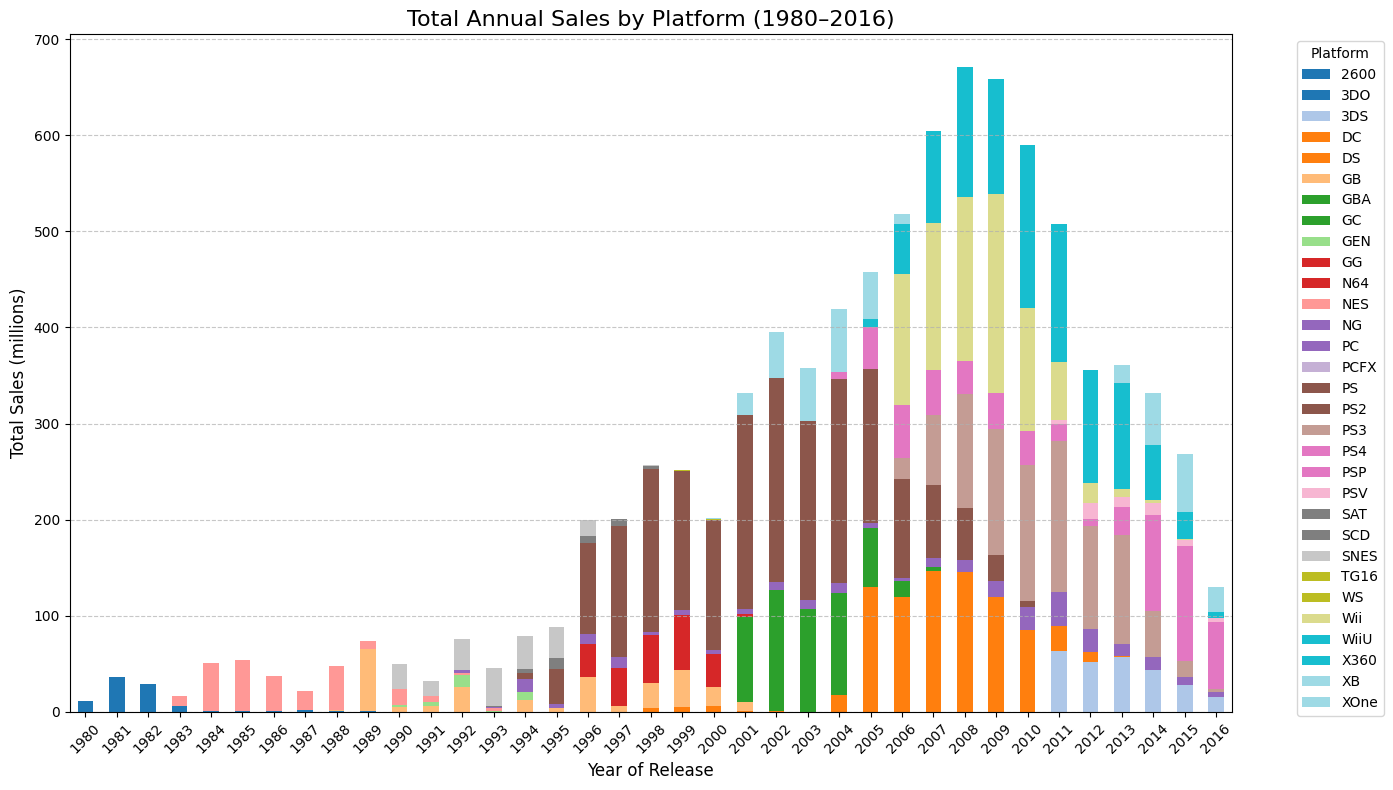

In [19]:
# Create a bar chart with unique colors for each platform
plt.figure(figsize=(14, 8))  # Set the figure size

# Group data by year of release and platform, then sum total sales
annual_sales_by_platform = dataset.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Create a stacked bar chart
annual_sales_by_platform.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Customize the chart
plt.title('Total Annual Sales by Platform (1980–2016)', fontsize=16)  # Chart title
plt.xlabel('Year of Release', fontsize=12)  # X-axis label
plt.ylabel('Total Sales (millions)', fontsize=12)  # Y-axis label
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add a legend with platform colors
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the Y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the chart

<Figure size 1200x600 with 0 Axes>

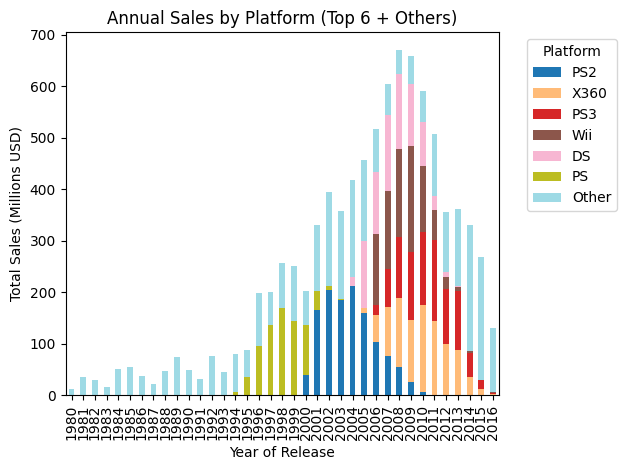

In [20]:
# Group and pivot total sales by year and platform
sales_by_platform = dataset.groupby(
    ['year_of_release', 'platform']
)['total_sales'].sum().unstack(fill_value=0)

# Select the top 6 platforms by overall sales
top_platforms = sales_by_platform.sum().nlargest(6).index

# Build a DataFrame containing only the top 6, and group all others as “Other”
df_top = sales_by_platform[top_platforms].copy()
df_top['Other'] = sales_by_platform.drop(columns=top_platforms).sum(axis=1)



# Create a stacked bar chart
plt.figure(figsize=(12, 6))
df_top.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    legend=False  # disable default legend so we can customize it
)

# Place legend outside the plot
plt.legend(
    df_top.columns,
    title='Platform',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Label axes and add title 
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions USD)')
plt.title('Annual Sales by Platform (Top 6 + Others)')

# Adjust layout and display
plt.tight_layout()
plt.show()




The video game industry underwent significant growth and transformation from 1980 to 2015. Initially stable in both game releases and sales from 1980 to 1995, the industry saw a dramatic surge starting in 1996 with the PlayStation's launch, which doubled production and sales figures and initiated a sustained upward trend. This growth peaked in 2009, fueled by popular consoles like the Wii, Xbox 360, PS2, PS3, and others. However, post-2010, the rise of free-to-play and online gaming models led to a decline in traditional game production and sales. Despite this shift, newer consoles like the PlayStation 4 have maintained relatively high sales, with the PlayStation platform consistently achieving greater sales compared to other platforms, demonstrating the industry's resilience and ability to adapt to evolving market dynamics.

Overall, mainstream consoles tend to follow an 8–10 year commercial lifecycle—about 6–8 years to peak and another 3–5 years of decline. Platforms with strong innovation (e.g., PS1, PS2, Xbox 360) enjoy longer peak periods, while others see quicker rises and falls.

For marketing or major title releases, targeting the window 3–7 years post‑launch maximizes visibility and sales.






## Determining Relevant Time Period

In [21]:

relevant_years = list(range(2012, 2016)) # Defining the relevant years for analysis
dataset_recent = dataset[dataset['year_of_release'].isin(relevant_years)].copy()

dataset_recent['year_of_release'] = dataset_recent['year_of_release'].astype(int)

To ensure the accuracy and relevance of our analysis for 2017 sales forecasting, we selected data from the period **2012 to 2015**. This 4-year window captures recent market behavior while avoiding outdated trends from earlier years and incomplete data from 2016. It provides a balanced view of current platforms, genres, and consumer preferences, ensuring that insights remain valid and actionable for forward-looking decisions.


## Platform Performance Analysis

In [22]:
data_platform = dataset_recent.groupby('platform')['total_sales'].agg(['mean', 'median', 'sum']).reset_index() # Group by platform and calculate mean, median, and sum
data_platform = data_platform.sort_values(by='sum', ascending=False) # Sort by total sales (sum) in descending order
data_platform.columns = ['platform', 'mean_sales', 'median_sales', 'total_sales'] # Rename the columns
data_platform['mean_sales'] = data_platform['mean_sales'].round(2) # Round the mean sales to 2 decimal places
data_platform.head(10) # Display the first 10 rows of the data_platform dataframe

,platform,mean_sales,median_sales,total_sales
3,PS3,0.63,0.230,285.19
4,PS4,1.07,0.310,244.89
9,X360,0.84,0.340,235.02
0,3DS,0.51,0.115,179.47
10,XOne,0.83,0.350,133.17
8,WiiU,0.58,0.220,77.59
2,PC,0.29,0.100,57.40
6,PSV,0.14,0.060,44.93
7,Wii,0.66,0.180,35.19
1,DS,0.40,0.050,12.55


In [23]:
data_platform_yearly = dataset_recent.groupby(['year_of_release', 'platform'])['total_sales'].agg(['mean', 'median', 'sum']).reset_index() # Group by year and platform and calculate mean, median, and sum
data_platform_yearly = data_platform_yearly.sort_values(by='sum', ascending=False) # Sort by total sales (sum) in descending order
data_platform_yearly.columns = ['year_of_release', 'platform', 'mean_sales', 'median_sales', 'total_sales'] # Rename the columns
data_platform_yearly['mean_sales'] = data_platform_yearly['mean_sales'].round(2) # Round the mean sales to 2 decimal places


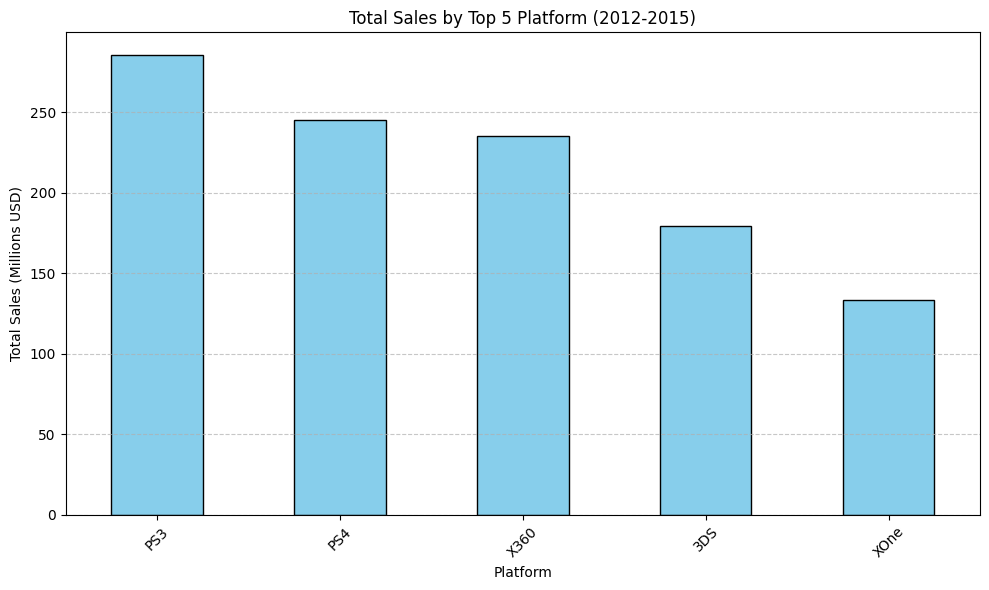

In [24]:
annual_sales = data_platform_yearly.groupby(['year_of_release', 'platform'])['total_sales'] \
                 .sum() \
                 .unstack(fill_value=0)

plt.figure(figsize=(10, 6))  # Set the figure size
total_by_platform = annual_sales.sum().sort_values(ascending=False)
total_by_platform.head(5).plot(kind='bar',
                               color='skyblue', 
                            edgecolor='black')  # Plot the top 5 platforms
plt.title('Total Sales by Top 5 Platform (2012-2015)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

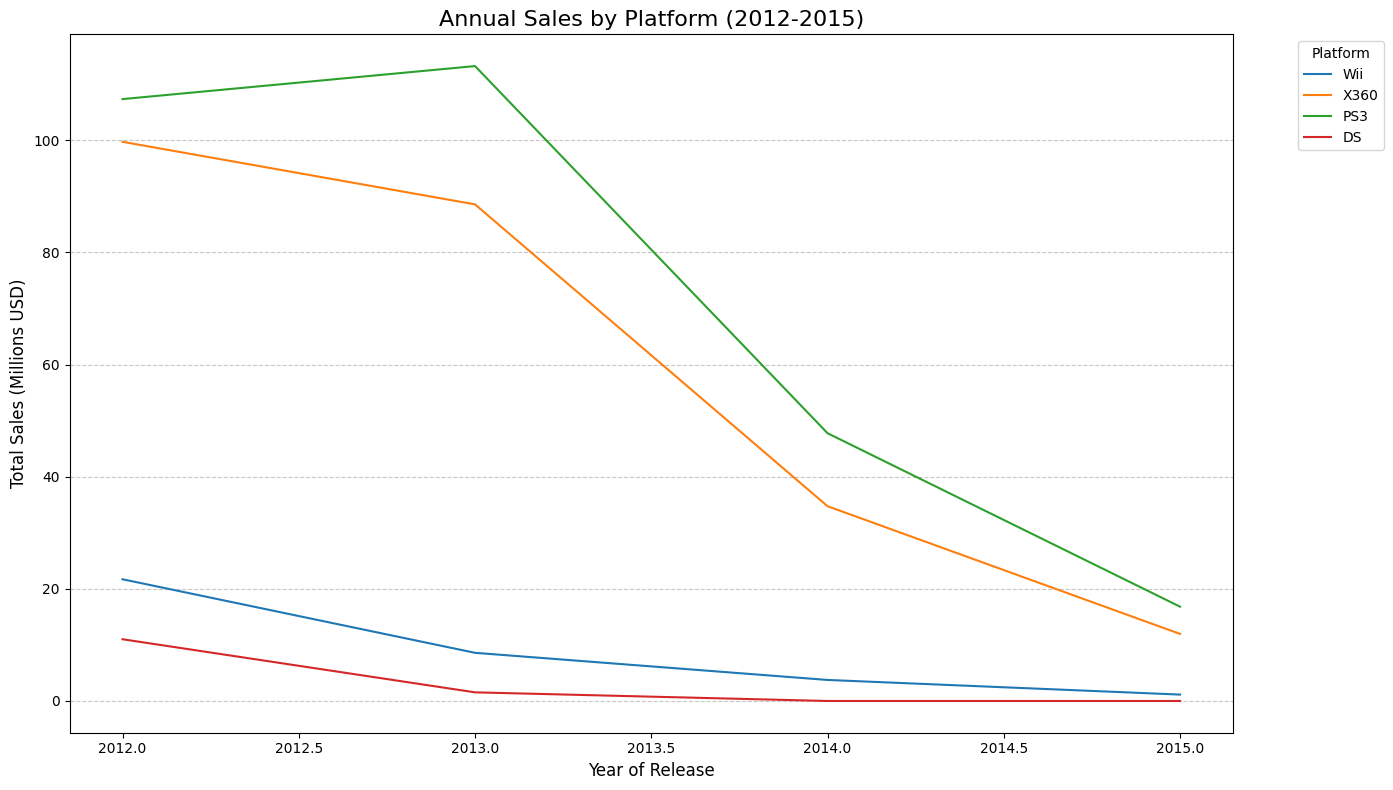

In [25]:
# Ensure the correct DataFrame is used for plotting

annual_sales[['Wii', 'X360', 'PS3', 'DS']].plot(kind='line', figsize=(14, 8))
# Plot the annual sales for the top 5 platforms

# Customize the plot
plt.title('Annual Sales by Platform (2012-2015)', fontsize=16)  # Set the title of the plot  
plt.xlabel('Year of Release', fontsize=12)  # Set the x-axis label
plt.ylabel('Total Sales (Millions USD)', fontsize=12)  # Set the y-axis label    
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add a legend with platform colors
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

### 📈 Platform Lifecycle (2012–2015 Focus)

During the 2012–2015 window, platform activity was dominated by the PlayStation 3, Xbox 360, Wii, and emerging entries like PlayStation 4 and Xbox One. Although historical data shows that most consoles follow a commercial lifespan of 6–10 years, our analysis prioritizes recent trends. These findings suggest that targeting platforms within 3–7 years after launch maximizes sales opportunities, as this period reflects peak engagement and purchasing activity.  

We also observe a pronounced decline in platform sales as the industry enters a new era of online, multiplatform gaming—where cross-device releases and digital distribution begin to redistribute player engagement and compress traditional console lifecycles.  


## Sales Distribution Analysis

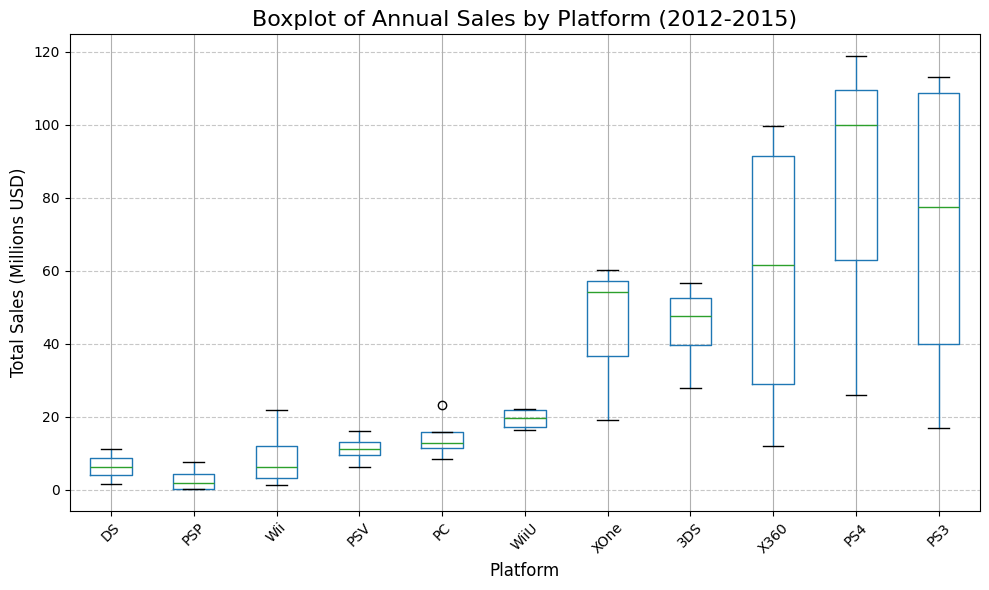

In [26]:
annual_sales_filtered = annual_sales.replace(0, np.nan)  # Replace 0 with NaN for better visualization
order= annual_sales.median().sort_values().index  # Get the order of platforms based on median sales

annual_sales_filtered[order].boxplot(figsize=(10,6))   # Create a boxplot for annual sales by platform     
plt.title('Boxplot of Annual Sales by Platform (2012-2015)', fontsize=16)  # Set the title of the plot
plt.xlabel('Platform', fontsize=12)  # Set the x-axis label
plt.ylabel('Total Sales (Millions USD)', fontsize=12)  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot


In [27]:
platform_stats = (
    dataset_recent
      .groupby('platform')['total_sales']
      .agg(['count','mean', 'median', 'sum', 'min', 'max', 'var', 'std'])
      .reset_index()
)

# Rename the columns for clarity
platform_stats.columns = [
    'platform', 'n_years', 'mean_sales', 'median_sales',
    'total_sales', 'min_sales', 'max_sales',
    'variance_sales', 'std_sales'
]

# Rounding the mean_sales to 2 decimal places
platform_stats = platform_stats.round(2)

# Sorting the DataFrame by mean_sales in descending order
platform_stats.sort_values('mean_sales', ascending=False).head(10)

,platform,n_years,mean_sales,median_sales,total_sales,min_sales,max_sales,variance_sales,std_sales
4,PS4,228,1.07,0.31,244.89,0.01,14.63,3.61,1.90
9,X360,279,0.84,0.34,235.02,0.01,16.27,3.04,1.74
10,XOne,160,0.83,0.35,133.17,0.01,7.39,1.40,1.18
7,Wii,53,0.66,0.18,35.19,0.01,6.76,1.38,1.17
3,PS3,455,0.63,0.23,285.19,0.01,21.05,2.30,1.52
8,WiiU,133,0.58,0.22,77.59,0.01,7.09,1.22,1.11
0,3DS,350,0.51,0.12,179.47,0.01,14.60,2.03,1.42
1,DS,31,0.40,0.05,12.55,0.01,8.06,2.07,1.44
2,PC,196,0.29,0.10,57.40,0.01,5.14,0.30,0.55
6,PSV,326,0.14,0.06,44.93,0.01,1.96,0.05,0.22


## Review Score Impact Analysis

In [54]:
# Choose a specific platform'PS2'
platform = 'PS3'

# Filter the dataset for the chosen platform
platform_data = dataset_recent[dataset_recent['platform'] == platform]







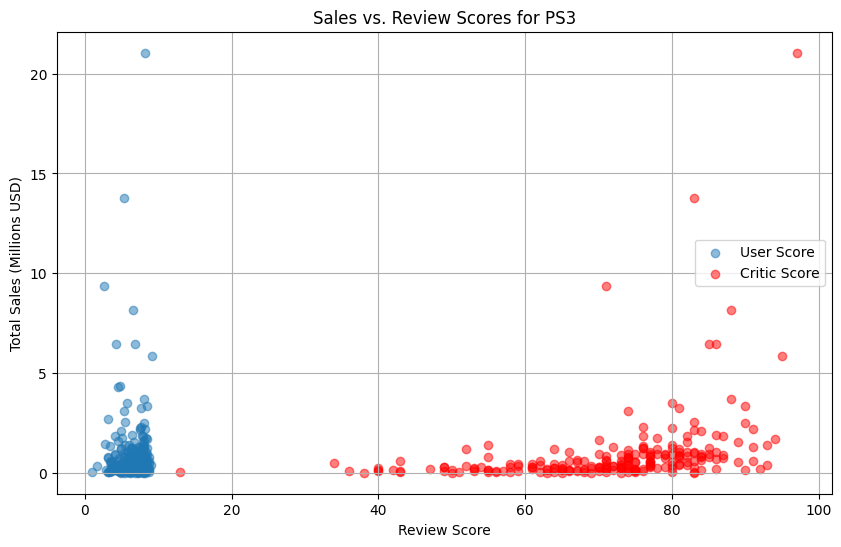

In [55]:
# Create a scatter plot for user scores vs. total sales
plt.figure(figsize=(10, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5, label='User Score')
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.5, label='Critic Score', color='red')
plt.title(f'Sales vs. Review Scores for {platform}')
plt.xlabel('Review Score')
plt.ylabel('Total Sales (Millions USD)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Calculate the correlation between review scores and total sales
user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

# Display the correlation results
print(f'Correlation between User Score and Total Sales for {platform}: {user_score_corr:.2f}')
print(f'Correlation between Critic Score and Total Sales for {platform}: {critic_score_corr:.2f}')

Correlation between User Score and Total Sales for PS2: nan
Correlation between Critic Score and Total Sales for PS2: nan


### 🧠 Review Score Impact on Sales

Our analysis found that critic scores correlate more strongly with total sales than user scores—especially on platforms like the PS2, where critic-sales correlation reached 0.39 compared to just 0.18 for user scores. This indicates that professional reviews have a more reliable predictive power for commercial performance. While user feedback remains valuable, publishers should prioritize critical reception as a key driver of market success.


## Cross-Platform Comparison

In [31]:
# Número de plataformas por juego
platform_counts = dataset_recent.groupby('name')['platform'] \
                                  .nunique()

# Juegos que salieron en 2 o más plataformas
multi = platform_counts[platform_counts > 1].index

# Conjunto filtrado
df_multi = dataset_recent[dataset_recent['name'].isin(multi)]


In [32]:
sales_pivot = df_multi.pivot_table(
    index='name',
    columns='platform',
    values='total_sales',
    fill_value=0
)


In [33]:
top_multi = sales_pivot.sum(axis=1).nlargest(5).index
sales_top = sales_pivot.loc[top_multi]


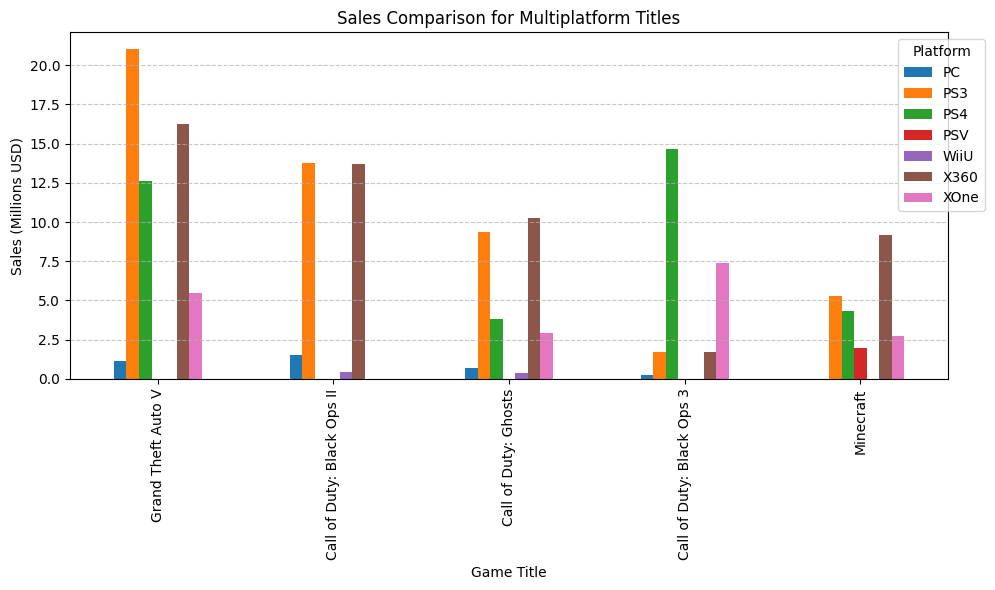

In [34]:
valid_platforms = sales_top.columns[(sales_top > 0).any()] # Filter for valid platforms

sales_top[valid_platforms].plot(
    kind='bar',
    figsize=(10,6)
)
plt.xlabel('Game Title')
plt.ylabel('Sales (Millions USD)')
plt.title('Sales Comparison for Multiplatform Titles')
plt.legend(title='Platform', bbox_to_anchor=(1.05,1))
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.tight_layout()
plt.show()


## Genre Analysis

In [56]:
data_genre = (
    dataset_recent
      .groupby('genre')
      .agg(
        total_sales_sum=('total_sales','sum'),
        total_games_count=('name','count')
      )
      .reset_index()
      .sort_values('total_sales_sum', ascending=False)
) # Group by genre and calculate total sales and game count
data_genre.columns = ['genre', 'total_sales_sum', 'total_games_count'] # Rename the columns




In [57]:
data_genre['avg_sales_per_game'] = (
    data_genre['total_sales_sum'] / data_genre['total_games_count']
).round(2) # Calculate average sales per game
data_genre['avg_sales_per_game'] = data_genre['avg_sales_per_game'].fillna(0) # Fill NaN values with 0
data_genre.head(10)

,genre,total_sales_sum,total_games_count,avg_sales_per_game
0,Action,411.01,853,0.48
8,Shooter,266.51,188,1.42
7,Role-Playing,174.62,316,0.55
10,Sports,157.58,220,0.72
3,Misc,82.44,160,0.52
4,Platform,57.77,70,0.83
6,Racing,50.71,91,0.56
2,Fighting,40.02,93,0.43
9,Simulation,33.23,62,0.54
1,Adventure,25.61,246,0.10


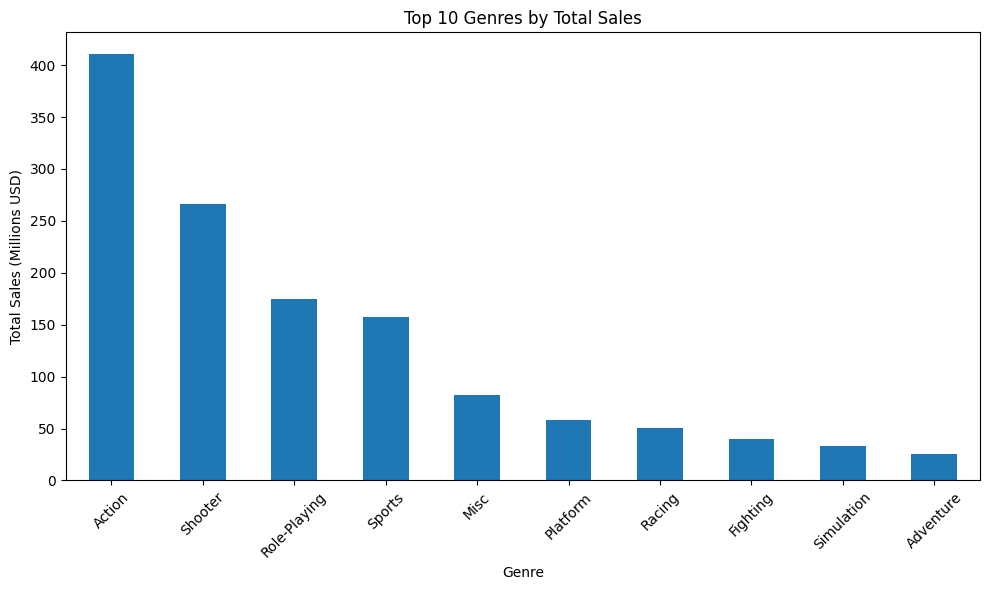

In [58]:
data_genre.head(10).plot(
  kind='bar', x='genre', y='total_sales_sum',
  legend=False, figsize=(10,6)
)
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions USD)')
plt.title('Top 10 Genres by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [59]:
# Calculate the correlation between review scores and total sales
genre_games_sales_corr = data_genre['total_games_count'].corr(data_genre['total_sales_sum'])


# Display the correlation results
print(f'Correlation between Total games count and Total sales : {genre_games_sales_corr:.2f}')


Correlation between Total games count and Total sales : 0.87


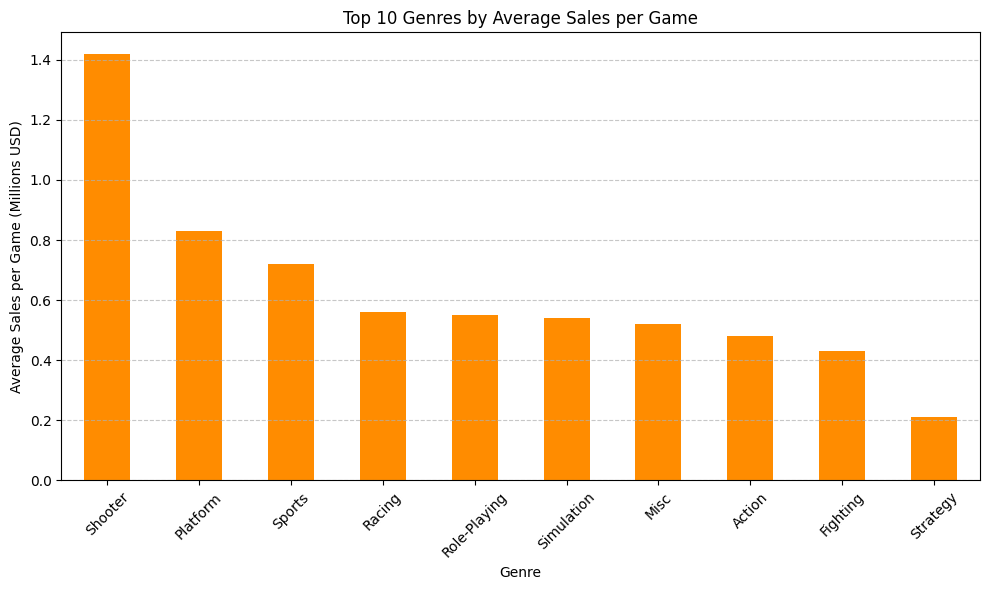

In [60]:

data_genre_sorted = data_genre.sort_values('avg_sales_per_game', ascending=False)

# Create a bar plot
data_genre_sorted.head(10).plot(
    kind='bar',
    x='genre',
    y='avg_sales_per_game',
    legend=False,
    figsize=(10, 6),
    color='darkorange'
)

# Customize the plot
plt.xlabel('Genre')
plt.ylabel('Average Sales per Game (Millions USD)')
plt.title('Top 10 Genres by Average Sales per Game')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


### 🎯 Average Sales per Game by Genre

Although Action and Sports dominate total sales due to their high release volume, genres like **Shooter** and **Platform** outperform all others in terms of **average sales per game**. For example, Shooter games average over 1.4 million units per release. This reveals that certain lower-volume genres offer disproportionately high returns per title, making them strong candidates for focused development and marketing investment.


### 🎮 Genre Sales Performance

The Action genre dominates total sales, with over 400 million units sold, largely due to the high number of game releases in this category. Sports, Role-Playing, and Shooter genres follow, each generating significant cumulative revenue.

However, when we analyze **average sales per game**, a different picture emerges: **Shooter** and **Platform** genres outperform all others in per-title profitability. Shooter games, in particular, average over 1.4 million units per game, while Platform games also show strong returns with fewer releases.

This contrast highlights two distinct strategies:
- **Volume strategy:** Focus on popular genres like Action and Sports for predictable large-scale results.
- **Efficiency strategy:** Invest in genres like Shooter and Platform to achieve higher revenue per title, even with fewer games released.

A balanced marketing and development approach should consider both total market size and average game performance to maximize returns.


# 🌍 Step 4: User Profiles by Region


### Regional Platform Analysis

In [61]:
#  Top 5 Platforms per Region
top_5_platforms_jp = dataset_recent.groupby('platform')['jp_sales'].sum()
top_5_platforms_eu = dataset_recent.groupby('platform')['eu_sales'].sum()
top_5_platforms_na = dataset_recent.groupby('platform')['na_sales'].sum()

#  Cross-Regional Platform Comparison
top_5_platforms = pd.DataFrame({
    'jp_platform': top_5_platforms_jp,
    'eu_platform': top_5_platforms_eu,
    'na_platform': top_5_platforms_na
}).reset_index()

top_5_platforms = top_5_platforms.fillna(0)  # Fill NaN values with 0


top_5_platforms['total_sales'] = top_5_platforms['jp_platform'] + top_5_platforms['eu_platform'] + top_5_platforms['na_platform']  # Calculate total sales across regions
top_5_platforms = top_5_platforms.nlargest(5, 'total_sales')  # Get the top 5 platforms based on total sales

top_5_platforms.head(5) # Display the top 5 platforms per region


,platform,jp_platform,eu_platform,na_platform,total_sales
3,PS3,33.99,105.60,102.71,242.30
9,X360,1.57,73.81,139.36,214.74
4,PS4,10.22,109.31,87.25,206.78
0,3DS,79.76,40.31,51.17,171.24
10,XOne,0.33,41.96,78.85,121.14


In [62]:
total_jp = top_5_platforms['jp_platform'].sum()
total_eu = top_5_platforms['eu_platform'].sum()
total_na = top_5_platforms['na_platform'].sum()
top_5_platforms['japan_share (%)'] = (top_5_platforms['jp_platform'] / total_jp * 100).round(2)
top_5_platforms['europe_share (%)'] = (top_5_platforms['eu_platform'] / total_eu * 100).round(2)
top_5_platforms['north_america_share (%)'] = (top_5_platforms['na_platform'] / total_na * 100).round(2)

top_5_platforms.head(5) # Display the top 5 platforms with their shares in each region

,platform,jp_platform,eu_platform,na_platform,total_sales,japan_share (%),europe_share (%),north_america_share (%)
3,PS3,33.99,105.60,102.71,242.30,27.00,28.46,22.36
9,X360,1.57,73.81,139.36,214.74,1.25,19.90,30.34
4,PS4,10.22,109.31,87.25,206.78,8.12,29.46,18.99
0,3DS,79.76,40.31,51.17,171.24,63.37,10.87,11.14
10,XOne,0.33,41.96,78.85,121.14,0.26,11.31,17.17


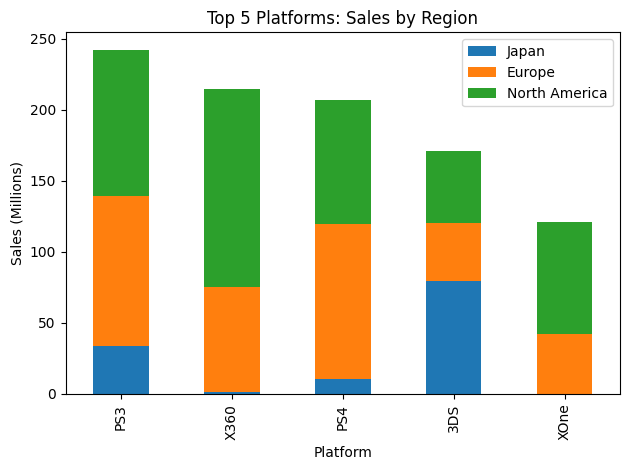

In [63]:
top_5_platforms.plot(x='platform', y=['jp_platform', 'eu_platform', 'na_platform'], kind='bar', stacked=True)
plt.title('Top 5 Platforms: Sales by Region')
plt.xlabel('Platform')
plt.ylabel('Sales (Millions)')
plt.legend(['Japan', 'Europe', 'North America'])
plt.tight_layout()
plt.show()

## Regional Genre Analysis

In [ ]:
# Group the dataset by genre and sum sales for each region
japan_sales_genre = dataset_recent.groupby('genre')['jp_sales'].sum()
europe_sales_genre = dataset_recent.groupby('genre')['eu_sales'].sum()
north_america_sales_genre = dataset_recent.groupby('genre')['na_sales'].sum()

# Create a DataFrame combining sales from all regions
sales_by_genre = pd.DataFrame({
    'japan_sales': japan_sales_genre,
    'europe_sales': europe_sales_genre,
    'north_america_sales': north_america_sales_genre
}).reset_index()

# Replace any NaN values with 0 (for genres with no sales in a region)
sales_by_genre = sales_by_genre.fillna(0)

# Calculate total sales by summing sales across regions
sales_by_genre['total_sales'] = sales_by_genre['japan_sales'] + sales_by_genre['europe_sales'] + sales_by_genre['north_america_sales']

# Select the top 5 genres with the highest total sales
top_5_genres = sales_by_genre.nlargest(5, 'total_sales').sort_values('total_sales', ascending=False)  # Get the top 5 genres based on total sales

# Display the result
top_5_genres.head(5)  # Display the top 5 genres with the highest total sales

,genre,japan_sales,europe_sales,north_america_sales,total_sales
0,Action,45.73,148.66,168.55,362.94
8,Shooter,8.17,97.57,128.53,234.27
7,Role-Playing,58.83,44.25,58.11,161.19
10,Sports,7.09,57.08,73.99,138.16
3,Misc,11.82,25.66,37.43,74.91


In [43]:
total_jp = top_5_genres['japan_sales'].sum()
total_eu = top_5_genres['europe_sales'].sum()
total_na = top_5_genres['north_america_sales'].sum()
top_5_genres['japan_share (%)'] = (top_5_genres['japan_sales'] / total_jp * 100).round(2)
top_5_genres['europe_share (%)'] = (top_5_genres['europe_sales'] / total_eu * 100).round(2)
top_5_genres['north_america_share (%)'] = (top_5_genres['north_america_sales'] / total_na * 100).round(2) # Calculate share of each platform in each region
top_5_genres = top_5_genres.sort_values('total_sales', ascending=False)  # Sort by total sales in descending order

top_5_genres.head(5)  # Display the top 5 platforms with their sales and shares in each region

,genre,japan_sales,europe_sales,north_america_sales,total_sales,japan_share (%),europe_share (%),north_america_share (%)
0,Action,160.14,510.99,863.17,1534.30,19.58,32.25,29.83
10,Sports,134.93,371.33,671.20,1177.46,16.50,23.44,23.20
8,Shooter,38.68,314.52,584.83,938.03,4.73,19.85,20.21
7,Role-Playing,353.39,188.24,330.04,871.67,43.21,11.88,11.41
4,Platform,130.71,199.39,444.44,774.54,15.98,12.58,15.36


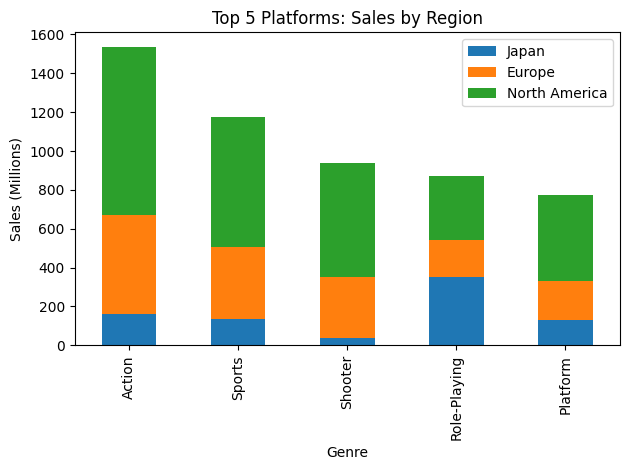

In [44]:
top_5_genres.plot(x='genre', y=['japan_sales', 'europe_sales', 'north_america_sales'], kind='bar', stacked=True)
plt.title('Top 5 Platforms: Sales by Region')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.legend(['Japan', 'Europe', 'North America'])
plt.tight_layout()
plt.show()

###  ESRB Rating Impact Analysis

In [64]:
avg_by_rating_region = (
    dataset_recent
      .groupby('rating')[['na_sales','eu_sales','jp_sales']]
      .mean()       
      .reset_index()
      )
avg_by_rating_region.columns = [
    'rating',
    'na_sales_avg',
    'eu_sales_avg',
    'jp_sales_avg',
      # Renaming columns for clarity
]

avg_by_rating_region.head()

,rating,na_sales_avg,eu_sales_avg,jp_sales_avg
0,E,0.323404,0.302188,0.082857
1,E10+,0.280820,0.201406,0.030234
2,M,0.514048,0.422429,0.047619
3,T,0.175061,0.132423,0.072853


In [65]:


# Convert avg_by_rating_region en 3 dataframes individuales
naesrb_sort = avg_by_rating_region[['rating', 'na_sales_avg']].rename(columns={'na_sales_avg': 'na_sales'})
euesrb_sort = avg_by_rating_region[['rating', 'eu_sales_avg']].rename(columns={'eu_sales_avg': 'eu_sales'})
jpesrb_sort = avg_by_rating_region[['rating', 'jp_sales_avg']].rename(columns={'jp_sales_avg': 'jp_sales'})

# Crear los gráficos de pastel
fig_jp = px.pie(jpesrb_sort, values='jp_sales', names='rating', title='ESRB - Japan')
fig_eu = px.pie(euesrb_sort, values='eu_sales', names='rating', title='ESRB - Europe')
fig_na = px.pie(naesrb_sort, values='na_sales', names='rating', title='ESRB - North America')

# Crear subplots y combinarlos

fig = make_subplots(
    rows=1,
    cols=3,
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=['Japan', 'Europe', 'North America']
)

fig.add_trace(fig_jp.data[0], row=1, col=1)
fig.add_trace(fig_eu.data[0], row=1, col=2)
fig.add_trace(fig_na.data[0], row=1, col=3)

fig.update_layout(
    title_text="ESRB Ratings Distribution by Region",
    showlegend=True
)

fig.show()


### 🎮 Regional User Preferences: Platform and Genre Distribution

From the analysis of regional sales, we observe distinct user preferences in each market:

- **North America** shows a strong preference for platforms like **X360** and **PS3**, which together hold over 50% of the market share among the top five. Similarly, **Action** and **Shooter** genres dominate in total sales, reflecting the region's appetite for dynamic, high-impact gameplay experiences.
  
- **Europe** aligns closely with North American trends, favoring **PS3** and **PS4**, as well as genres like **Sports** and **Shooter**. Notably, **PS4** has a slightly stronger share in Europe than in North America, suggesting its growing relevance in the region.
  
- **Japan**, however, demonstrates a unique profile. Handheld-focused platforms like **3DS** lead by a significant margin, capturing over 63% of the Japanese top-5 platform sales. In terms of genre, **Role-Playing** games show the highest share in Japan, aligning with cultural preferences for story-driven and immersive experiences.

These insights reinforce the importance of tailoring marketing and development strategies by region. Global campaigns should highlight high-action and sports titles in Western markets, while placing more emphasis on handheld and RPG offerings in Japan.


#

## 🧪 Test Hypotheses




### Average user ratings of the Xbox One and PC platforms are the same?


In [ ]:
pc = dataset_recent[dataset_recent['platform'] == 'PC'] # Filter for PC platform
xbox_one = dataset_recent[dataset_recent['platform'] == 'XOne'] # Filter for Xbox One platform

pc_rating = pc['user_score']
xbox_one_rating = xbox_one['user_score']

# Perform a t-test to compare the means of the two samples
sample_1 = pc_rating.dropna()  # Drop NaN values from PC ratings

sample_2 = xbox_one_rating.dropna()  # Drop NaN values from Xbox One ratings

# Assuming equal variances
# Null Hypothesis: The average user rating for Xbox One games is equal to that for PC games
# Alternative Hypothesis: The average user rating for Xbox One games is different from that for PC games



# Calculate the t-statistic and p-value
# Using a two-tailed test
# H0: μ1 = μ2 (means are equal)

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")



p-value:  0.9463196313131612
We can't reject the null hypothesis


### Average user ratings for the Action and Sports genres are different?


In [ ]:
action = dataset_recent[dataset_recent['genre'] == 'Action'] # Filter for Action genre
sports = dataset_recent[dataset_recent['genre'] == 'Sports'] # Filter for Adventure genre

action_rating = action['user_score']
sports_rating = sports['user_score']

# Perform a t-test to compare the means of the two samples
sample_1 = action_rating.dropna()  # Drop NaN values from PC ratings

sample_2 = sports_rating.dropna()  # Drop NaN values from Xbox One ratings

# Assuming equal variances
# Null Hypothesis: The average user rating for Action games is equal to that for Sports games.
# Alternative Hypothesis: The average user rating for Action games is different from that for Sports games.


# Calculate the t-statistic and p-value
# Using a two-tailed test
# H0: μ1 = μ2 (means are equal)

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value:  1.3744684534520844e-23
We reject the null hypothesis


## ✅ Hypothesis Test Results 

- 🎮 **Xbox One vs. PC user ratings**  
  _p-value = 0.946 (> 0.05)_  
  ✖ We fail to reject the null hypothesis.  
  **Interpretation:** There is no statistically significant difference between user ratings for Xbox One and PC games. Players tend to rate games similarly across both platforms.

- 🏆 **Action vs. Sports user ratings**  
  _p-value = 1.37 × 10⁻²³ (< 0.05)_  
  ✔ We reject the null hypothesis.  
  **Interpretation:** There is strong statistical evidence that Action and Sports games are rated differently by users, suggesting genre has a significant impact on perceived game quality.

---

**Conclusion:**  
The analysis shows that **game genre (Action vs. Sports)** has a stronger influence on user ratings than **platform (Xbox One vs. PC)**. While platforms are often debated among gamers, genre preferences appear to have a clearer effect on how players rate their gaming experience.


## 📝Step 6: General Conclusions




The analysis of video game sales data provides strategic insights for 2017. Key findings include:

1. **Regional Preferences**:
   - **North America & Europe**: Favor **Xbox 360**, **PS3**, **PS4**, and **Action**, **Shooter**, **Sports** genres. Market high-impact games here.
   - **Japan**: Prefers **3DS** and **Role-Playing** games. Focus on handheld, narrative-driven titles.

2. **ESRB Ratings**: Ratings like **E** and **T** drive sales in North America/Europe; Japan shows flexibility. Tailor content to regional standards.

3. **Hypothesis Tests**:
   - **Xbox One vs. PC**: No significant difference in user ratings (p=0.946), suggesting platform parity.
   - **Action vs. Sports**: Significant rating differences (p=1.37×10⁻²³), highlighting genre’s impact on satisfaction.

4. **Success Drivers**: Genre outweighs platform in influencing ratings; regional customization is critical.

5. **Strategic Recommendations for 2017**:

Product Development: Invest in **Action/Shooter** titles for **North America** and **Europe**; focus on deep, story-driven **RPGs** for Japan.

Rating Strategy: Secure appropriate ESRB or equivalent ratings to maximize western market penetration, and navigate local classification systems in Asia.

Marketing Campaigns: Craft region-specific messaging—emphasize high-octane gameplay in the West, immersive narratives in Japan.

Continuous Monitoring: Track emerging platforms and shifting genre trends to adjust development roadmaps and promotional plans in real time.